In [1]:
# Importing Libraries
import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_ind = df[df['job_country'] == 'India']
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"[powershell, python, sql, mysql, sql server, d...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"[python, sql, aws, pyspark, docker, jira]","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"[excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"[c#, sql]","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [3]:
df_skills = df_ind.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,powershell,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,python,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,mysql,"{'cloud': ['databricks', 'azure'], 'databases'..."
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,sql server,"{'cloud': ['databricks', 'azure'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,c#,"{'programming': ['c#', 'sql']}"
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,sql,"{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [4]:
df_skills.groupby(['job_skills', 'job_title_short']).size()

job_skills  job_title_short      
airflow     Business Analyst           19
            Cloud Engineer             29
            Data Analyst               89
            Data Engineer            2990
            Data Scientist            327
                                     ... 
zoom        Data Scientist             32
            Senior Data Analyst         1
            Senior Data Engineer       14
            Senior Data Scientist       4
            Software Engineer          11
Length: 1689, dtype: int64

In [5]:
df_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_count = df_count.reset_index(name='skill_count')

df_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [6]:
job_titles = df_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

0 Data Analyst
1 Data Engineer
2 Data Scientist


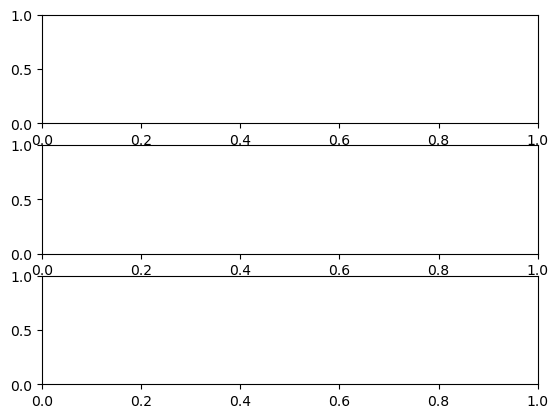

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    print(i, job_title)

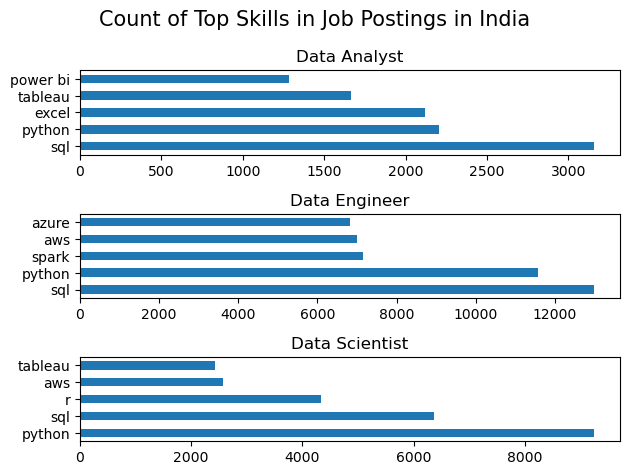

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_count[df_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings in India', fontsize=15)
fig.tight_layout()
plt.show()

In [9]:
df_job_title_count = df_ind['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [10]:
pd.merge(df_count, df_job_title_count, how='left', on='job_title_short')

,job_skills,job_title_short,skill_count,jobs_total
0,sql,Data Engineer,12993,19062
1,python,Data Engineer,11568,19062
2,python,Data Scientist,9248,13279
3,spark,Data Engineer,7157,19062
4,aws,Data Engineer,6993,19062
...,...,...,...,...
1684,esquisse,Data Scientist,1,13279
1685,node.js,Senior Data Analyst,1,1083
1686,matlab,Cloud Engineer,1,351
1687,fastapi,Cloud Engineer,1,351


In [11]:
df_skill_perc = pd.merge(df_count, df_job_title_count, how='left', on='job_title_short')

df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total
0,sql,Data Engineer,12993,19062
1,python,Data Engineer,11568,19062
2,python,Data Scientist,9248,13279
3,spark,Data Engineer,7157,19062
4,aws,Data Engineer,6993,19062
...,...,...,...,...
1684,esquisse,Data Scientist,1,13279
1685,node.js,Senior Data Analyst,1,1083
1686,matlab,Cloud Engineer,1,351
1687,fastapi,Cloud Engineer,1,351


In [12]:
df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count'] / df_skill_perc['jobs_total']

df_skill_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


### Final Plot

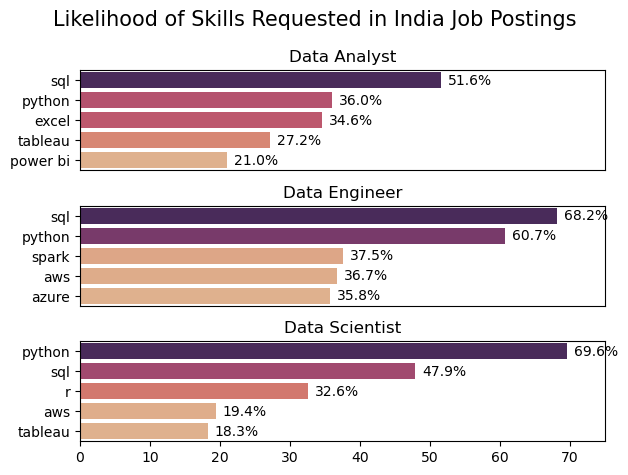

In [13]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='flare')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 75)

    #For Percentage Markings
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.1f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=15)
fig.tight_layout()
plt.show()